In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
from scipy.stats import norm

import infomeasure as im

sns.set(style="whitegrid")
np.random.seed(42)

In [ ]:
# the 16 estimators supported by infomeasure
ENTROPY_ESTIMATORS = [
    "discrete",
    "miller_madow",
    "grassberger",
    "shrink",
    "cs",
    "cwj",
    "bayes",
    # "nsb",
    # "ansb",
    "zhang",
    "bonachela",
    "kernel",
    "kl", 
    #"ordinal", # for time series analysis
    #"renyi", 
    #"tsallis",
]


In [152]:
# generate a test dataset
data = np.random.normal(size=5000) #use normal distribution

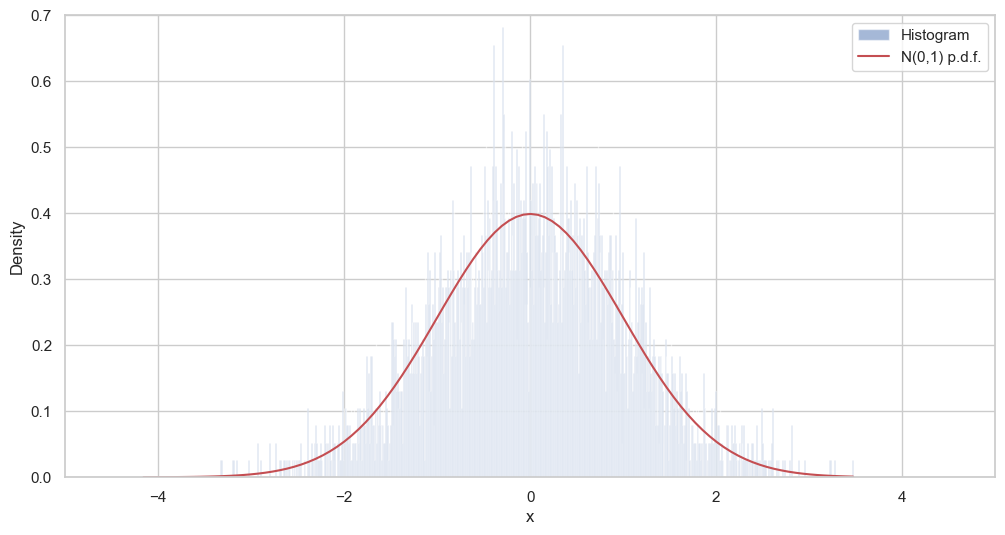

In [177]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.figure(figsize=(12, 6))
ax = plt.gca()

ax.hist(data, bins=1000, density=True, alpha=0.5, label="Histogram")

x_grid = np.linspace(data.min(), data.max(), 100)
pdf = norm.pdf(x_grid, loc=0, scale=1)

ax.plot(
    x_grid,
    pdf,
    "r-",
    lw=1.5,
    label="N(0,1) p.d.f."
)

# ax.set_title("Observed data distribution")
ax.set_xlabel("x")
ax.set_ylabel("Density")
ax.set_xlim([-5, 5])
ax.set_ylim([0.0, 0.7])
ax.legend()

plt.show()


In [178]:
data

array([ 0.49973493, -0.42767372,  0.24712682, ...,  0.14101014,
       -2.18197284, -0.00639759], shape=(5000,))

In [183]:
results = []

for est in ENTROPY_ESTIMATORS:
    try:
        if est == 'bayes':
            res = im.entropy(data, approach=est, alpha=0.5, base=2)
        elif est == 'kernel':
            res = im.entropy(data, approach=est, bandwidth=0.5, kernel='gaussian', base=2)
        elif est == 'kl':
            res = im.entropy(data, approach='kl', k=10, minkowski_p=2, base=2)
        elif est == 'renyi':
            res = im.entropy(data, approach=est, alpha=1.5, base=2)
        elif est == 'tsallis':
            res = im.entropy(data, approach=est, q=1.5, base=2)
        else:
            res = im.entropy(data, approach=est, base=2)
        results.append({
            "estimator": est,
            "entropy": res,
            "status": "ok"
        })
    except Exception as e:
        results.append({
            "estimator": est,
            "entropy": np.nan,
            "status": "failed",
            "error": str(e)
        })

df_entropy = pd.DataFrame(results)
df_entropy


2026-01-15 23:03:28,279 |  WARNING | base.py:1227 | The data looks like a float array (float64). Make sure it is properly symbolized or discretized for the entropy estimation.
2026-01-15 23:03:28,280 |  WARNING | base.py:1227 | The data looks like a float array (float64). Make sure it is properly symbolized or discretized for the entropy estimation.
2026-01-15 23:03:28,281 |  WARNING | base.py:1227 | The data looks like a float array (float64). Make sure it is properly symbolized or discretized for the entropy estimation.
2026-01-15 23:03:28,283 |  WARNING | base.py:1227 | The data looks like a float array (float64). Make sure it is properly symbolized or discretized for the entropy estimation.
2026-01-15 23:03:28,285 |  WARNING | base.py:1227 | The data looks like a float array (float64). Make sure it is properly symbolized or discretized for the entropy estimation.
2026-01-15 23:03:28,287 |  WARNING | base.py:1227 | The data looks like a float array (float64). Make sure it is properl

,estimator,entropy,status
0,discrete,12.287712,ok
1,miller_madow,13.008916,ok
2,grassberger,13.841806,ok
3,shrink,12.287712,ok
4,cs,24.577882,ok
5,cwj,23.579609,ok
6,bayes,12.287712,ok
7,zhang,13.120314,ok
8,bonachela,21.905512,ok
9,kernel,2.083968,ok


In [184]:
im.entropy(data, approach='nsb', base=2)

2026-01-15 23:03:48,717 |  WARNING | base.py:1227 | The data looks like a float array (float64). Make sure it is properly symbolized or discretized for the entropy estimation.
2026-01-15 23:03:48,719 |  WARNING | nsb.py:105 | No coincidences in data - NSB estimator returns NaN


nan

In [185]:
im.entropy(data, approach='ansb', base=2)

2026-01-15 23:03:49,565 |  WARNING | base.py:1227 | The data looks like a float array (float64). Make sure it is properly symbolized or discretized for the entropy estimation.
2026-01-15 23:03:49,567 |  WARNING | ansb.py:93 | Data is not sufficiently undersampled (N/K = 1.000 > 0.1), so calculation may diverge...
2026-01-15 23:03:49,568 |  WARNING | ansb.py:102 | No coincidences in data - ANSB estimator is undefined


nan

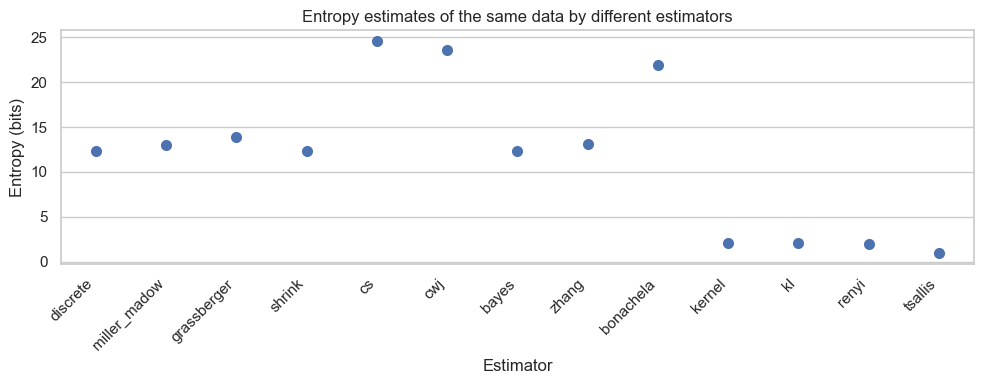

In [186]:
plt.figure(figsize=(10,4))

sns.stripplot(
    data=df_entropy,
    x="estimator",
    y="entropy",
    dodge=False,
    size=8
)

plt.xticks(rotation=45, ha="right")
plt.title("Entropy estimates of the same data by different estimators")
plt.ylabel("Entropy (bits)")
plt.xlabel("Estimator")
# plt.legend(title="Status")
plt.tight_layout()
plt.show()


In [187]:
def bin_data(x, num_bins):
    return np.digitize(x, bins=np.linspace(x.min(), x.max(), num_bins))

In [194]:
bin_sizes = [3000, 2000, 1500, 1000, 500, 100, 50, 10]
all_results = []

for bins in bin_sizes:
    data_binned = bin_data(data, bins)
    
    for est in ENTROPY_ESTIMATORS:
        try:
            if est == 'bayes':
                res = im.entropy(data_binned, approach=est, alpha=0.5, base=2)
            elif est == 'kernel':
                res = im.entropy(data_binned, approach=est, bandwidth=0.5, kernel='gaussian', base=2)
            elif est == 'kl':
                res = im.entropy(data_binned, approach=est, k=10, minkowski_p=2, base=2)
            elif est == 'renyi':
                res = im.entropy(data_binned, approach=est, alpha=1.5, base=2)
            elif est == 'tsallis':
                res = im.entropy(data_binned, approach=est, q=1.5, base=2)
            else:
                res = im.entropy(data_binned, approach=est, base=2)
            all_results.append({
                "binning": bins,
                "estimator": est,
                "entropy": res,
                "status": "ok"
            })
        except Exception:
            all_results.append({
                "binning": bins,
                "estimator": est,
                "entropy": np.nan,
                "status": "failed"
            })

df_binning = pd.DataFrame(all_results)


In [195]:
df_binning

,binning,estimator,entropy,status
0,3000,discrete,10.339265,ok
1,3000,miller_madow,10.569230,ok
2,3000,grassberger,10.629524,ok
3,3000,shrink,10.615291,ok
4,3000,cs,10.636577,ok
...,...,...,...,...
99,10,bonachela,2.359993,ok
100,10,kernel,2.368521,ok
101,10,kl,-28.800744,ok
102,10,renyi,31.514345,ok


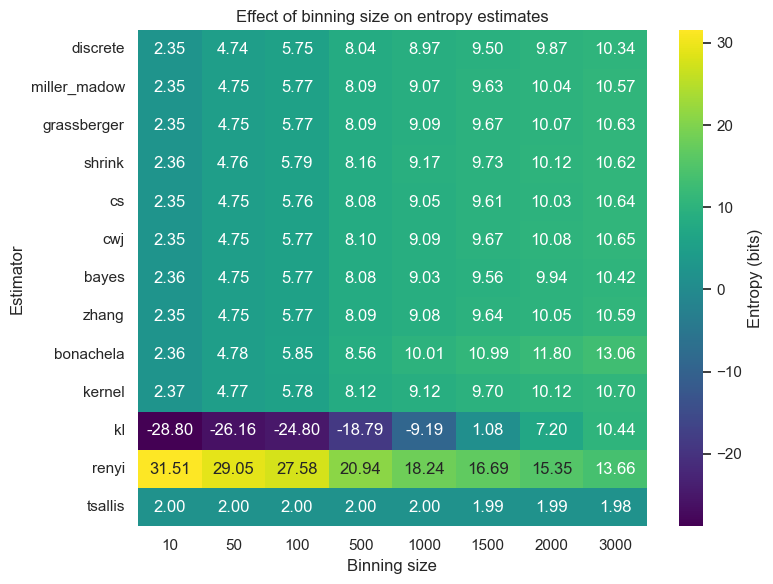

In [ ]:
pivot = df_binning.pivot_table(
    index="estimator",
    columns="binning",
    values="entropy"
)
pivot= pivot.reindex(ENTROPY_ESTIMATORS)
plt.figure(figsize=(8,6))
sns.heatmap(
    pivot,
    annot=True,
    fmt=".2f",
    cmap="viridis",
    cbar_kws={"label": "Entropy (bits)"}
)

plt.title("Effect of binning size on entropy estimates")
plt.xlabel("Binning size")
plt.ylabel("Estimator")
plt.tight_layout()
plt.show()


In [258]:
# the mutual information calculation
Y_indep = np.random.randn(5000) #Independence

noise = 0.5 * np.random.randn(5000)
Y_linear = data + noise #Linear correlated

Y_nonlinear = data**2 + 0.5 * np.random.randn(5000) #Nonlinear dependence


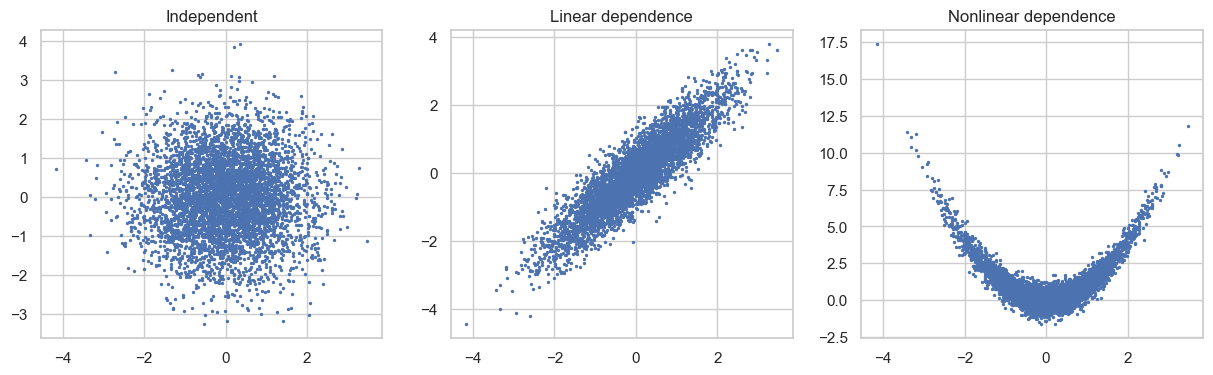

In [259]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].scatter(data, Y_indep, s=2)
axs[0].set_title("Independent")

axs[1].scatter(data, Y_linear, s=2)
axs[1].set_title("Linear dependence")

axs[2].scatter(data, Y_nonlinear, s=2)
axs[2].set_title("Nonlinear dependence")

plt.show()

In [260]:
MI_ESTIMATORS = [
    "discrete",
    "miller_madow",
    "grassberger",
    "shrink",
    "cs",
    "cwj",
    "bayes",
    # "nsb",
    # "ansb",
    "zhang",
    "bonachela",
    "kernel",
    "kl", 
    #"ordinal", # for time series analysis
    "renyi", 
    "tsallis",
]

In [266]:
# Y=Y_indep
# Y=Y_linear
Y=Y_nonlinear

In [267]:
records = []
for est in MI_ESTIMATORS:
    try:
        if est == 'bayes':
            mi = im.mutual_information(data, Y, approach=est, alpha=0.5, base=2)
        elif est == 'kernel':
            mi = im.mutual_information(data, Y, approach=est, bandwidth=0.5, kernel='gaussian', base=2)
        elif est == 'kl':
            mi = im.mutual_information(data, Y, approach='metric', k=10, minkowski_p=2, base=2)
        elif est == 'renyi':
            mi = im.mutual_information(data, Y, approach=est, alpha=1.5, base=2)
        elif est == 'tsallis':
            mi = im.mutual_information(data, Y, approach=est, q=1.5, base=2)
        else:
            mi = im.mutual_information(data, Y, approach=est, base=2)
    except Exception:
        mi = np.nan

    records.append({
        "estimator": est,
        "mi": mi,
    })
df_mi = pd.DataFrame(records)
df_mi

2026-01-16 02:40:55,547 |  WARNING | mixins.py:399 | The data looks like a float array ([dtype('float64'), dtype('float64')]). Make sure it is properly symbolized or discretized for the mutual information estimation.
2026-01-16 02:40:55,552 |  WARNING | mixins.py:399 | The data looks like a float array ([dtype('float64'), dtype('float64')]). Make sure it is properly symbolized or discretized for the mutual information estimation.
2026-01-16 02:40:55,556 |  WARNING | base.py:1227 | The data looks like a float array (float64). Make sure it is properly symbolized or discretized for the entropy estimation.
2026-01-16 02:40:55,557 |  WARNING | base.py:1227 | The data looks like a float array (float64). Make sure it is properly symbolized or discretized for the entropy estimation.
2026-01-16 02:40:55,557 |  WARNING | base.py:1237 | Some of the data looks like a float array. Make sure it is properly symbolized or discretized for the entropy estimation.
2026-01-16 02:40:55,565 |  WARNING | bas

,estimator,mi
0,discrete,12.287712
1,miller_madow,13.008916
2,grassberger,13.841806
3,shrink,12.287712
4,cs,NaN
5,cwj,NaN
6,bayes,12.287712
7,zhang,13.120314
8,bonachela,21.905512
9,kernel,0.586278


In [268]:
bin_sizes = [3000, 2000, 1500, 1000, 500, 100, 50, 10]

all_records = []
for est in MI_ESTIMATORS:
    for bins in bin_sizes:
        data_binned = bin_data(data, bins)
        Y_binned = bin_data(Y, bins)
        try:
            if est == 'bayes':
                mi = im.mutual_information(data_binned, Y_binned, approach=est, alpha=0.5, base=2)
            elif est == 'kernel':
                mi = im.mutual_information(data_binned, Y_binned, approach=est, bandwidth=0.5, kernel='gaussian', base=2)
            elif est == 'kl':
                mi = im.mutual_information(data_binned, Y_binned, approach='metric', k=10, minkowski_p=2, base=2)
            elif est == 'renyi':
                mi = im.mutual_information(data_binned, Y_binned, approach=est, alpha=1.5, base=2)
            elif est == 'tsallis':
                mi = im.mutual_information(data_binned, Y_binned, approach=est, q=1.5, base=2)
            else:
                mi = im.mutual_information(data_binned, Y_binned, approach=est, base=2)
        except Exception:
            mi = np.nan

        all_records.append({
            "estimator": est,
            "bins": bins,
            "mi": mi,
        })

2026-01-16 02:41:16,651 |  WARNING | base.py:168 | Mean of local values 10.494252553481067 does not match the global value 10.615290633379573 for ShrinkEntropyEstimator. Diff: -1.21e-01. 
2026-01-16 02:41:16,653 |  WARNING | base.py:168 | Mean of local values 9.334111026189985 does not match the global value 9.527035807254702 for ShrinkEntropyEstimator. Diff: -1.93e-01. 
2026-01-16 02:41:16,660 |  WARNING | base.py:168 | Mean of local values 9.956063784795065 does not match the global value 10.119095389662402 for ShrinkEntropyEstimator. Diff: -1.63e-01. 
2026-01-16 02:41:16,662 |  WARNING | base.py:168 | Mean of local values 8.806468618868475 does not match the global value 8.969644386897468 for ShrinkEntropyEstimator. Diff: -1.63e-01. 
2026-01-16 02:41:16,670 |  WARNING | base.py:168 | Mean of local values 9.558337344424219 does not match the global value 9.72692993507681 for ShrinkEntropyEstimator. Diff: -1.69e-01. 
2026-01-16 02:41:16,673 |  WARNING | base.py:168 | Mean of local val

In [269]:
df_mi_all = pd.DataFrame(all_records)
df_mi_all

,estimator,bins,mi
0,discrete,3000,7.365184e+00
1,discrete,2000,6.393904e+00
2,discrete,1500,5.661910e+00
3,discrete,1000,4.652922e+00
4,discrete,500,3.054319e+00
...,...,...,...
99,tsallis,1000,-1.143991e+03
100,tsallis,500,-6.428915e+02
101,tsallis,100,2.195446e+06
102,tsallis,50,4.881384e+06


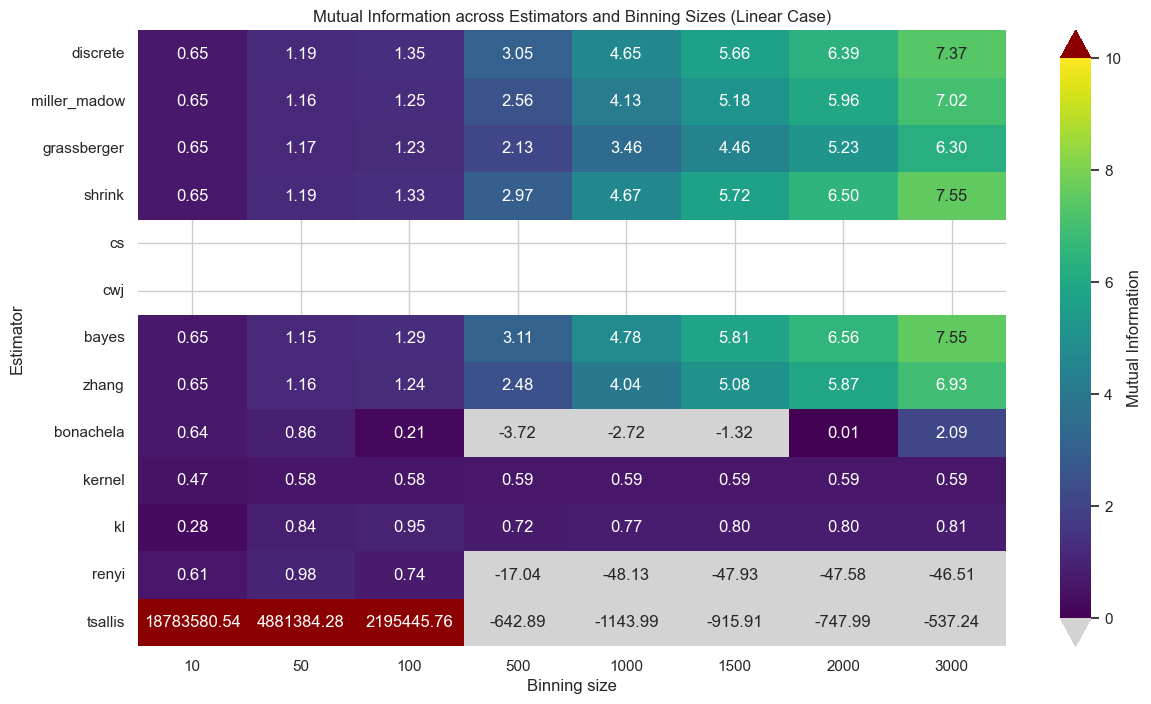

In [270]:
df_mi_all = pd.DataFrame(all_records)

pivot_mi = df_mi_all.pivot(
    index="estimator",
    columns="bins",
    values="mi"
)
pivot_mi = pivot_mi.reindex(MI_ESTIMATORS)

plt.figure(figsize=(14, 8))
cmap = plt.cm.viridis.copy()
cmap.set_under("lightgray")   
cmap.set_over("darkred")   
sns.heatmap(
    pivot_mi,
    cmap=cmap,
    vmin=0.0,
    vmax=10.0,
    # norm=LogNorm(vmin=1e-4, vmax=pivot_mi.max().max()),
    annot=True,
    fmt=".2f",
    cbar_kws={"label": "Mutual Information", "extend": "both"}
)

plt.title("Mutual Information across Estimators and Binning Sizes (Linear Case)")
plt.xlabel("Binning size")
plt.ylabel("Estimator")
plt.show()


In [ ]:
import random
# generate a simple data set with 100 alphabet.
simple = random.randint(1, 100)

In [280]:
simple_set=[]

for i in range(10000):
    simple_set.append(random.randint(1, 100))

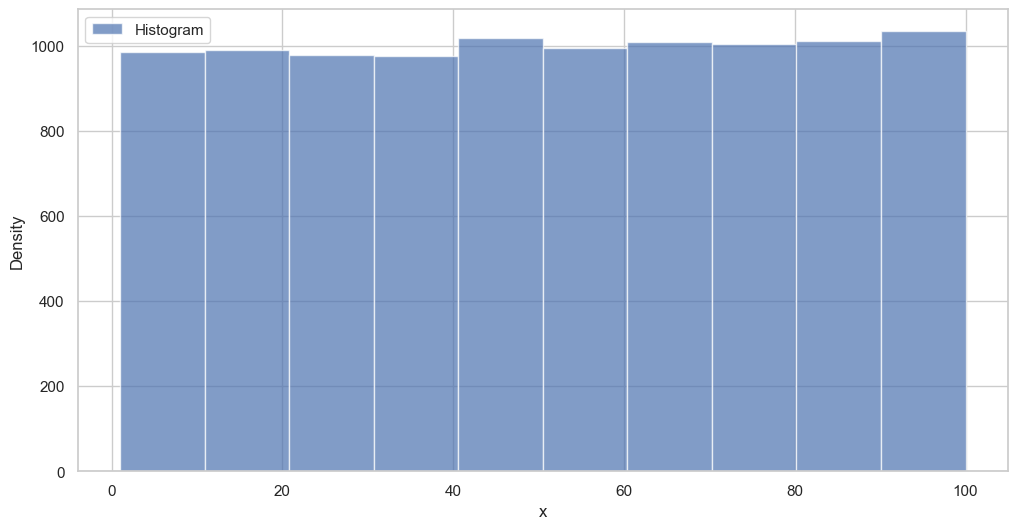

In [285]:
plt.figure(figsize=(12, 6))
ax = plt.gca()

ax.hist(simple_set, density=False, alpha=0.7, label="Histogram")

# x_grid = np.linspace(data.min(), data.max(), 100)
# pdf = norm.pdf(x_grid, loc=0, scale=1)

# ax.plot(
#     x_grid,
#     pdf,
#     "r-",
#     lw=1.5,
#     label="N(0,1) p.d.f."
# )

# ax.set_title("Observed data distribution")
ax.set_xlabel("x")
ax.set_ylabel("Density")
# ax.set_xlim([-5, 5])
# ax.set_ylim([0.0, 0.7])
ax.legend()

plt.show()

# The examination score case study

In [332]:
# COSTRUCT THE 32 SCORES IN A CLASS
# def generate_class_scores(
#     n_students=32,
#     mean=70,
#     std=10,
#     low=0,
#     high=100,
#     random_state=None,
# ):
#     rng = np.random.default_rng(random_state)
#     scores = rng.normal(mean, std, size=n_students)
#     scores = np.clip(scores, low, high)
#     scores = np.rint(scores).astype(int)
#     return scores

def generate_class_scores_binned(
    n_students=32,
    mean=60,
    std=20,
    score_min=0,
    score_max=100,
    n_bins=101,          # when n_bins = 101 -> no binning
    random_state=None,
):
    """
    Generate exam scores for one class with controllable grading resolution.
    """
    rng = np.random.default_rng(random_state)

    # latent continuous scores
    scores = rng.normal(mean, std, size=n_students)
    scores = np.clip(scores, score_min, score_max)

    # define bin edges
    bin_edges = np.linspace(score_min, score_max, n_bins + 1)

    # discretize
    binned_scores = np.digitize(scores, bin_edges, right=False) - 1
    binned_scores = np.clip(binned_scores, 0, n_bins - 1)

    return binned_scores



In [333]:
def generate_multiple_classes(
    n_classes,
    n_students=32,
    n_bins=101,
    **kwargs
):
    all_scores = []
    for i in range(n_classes):
        scores = generate_class_scores_binned(
            n_students=n_students,
            random_state=i,
            n_bins = n_bins,
            **kwargs
        )
        all_scores.append(scores)
    return np.concatenate(all_scores)


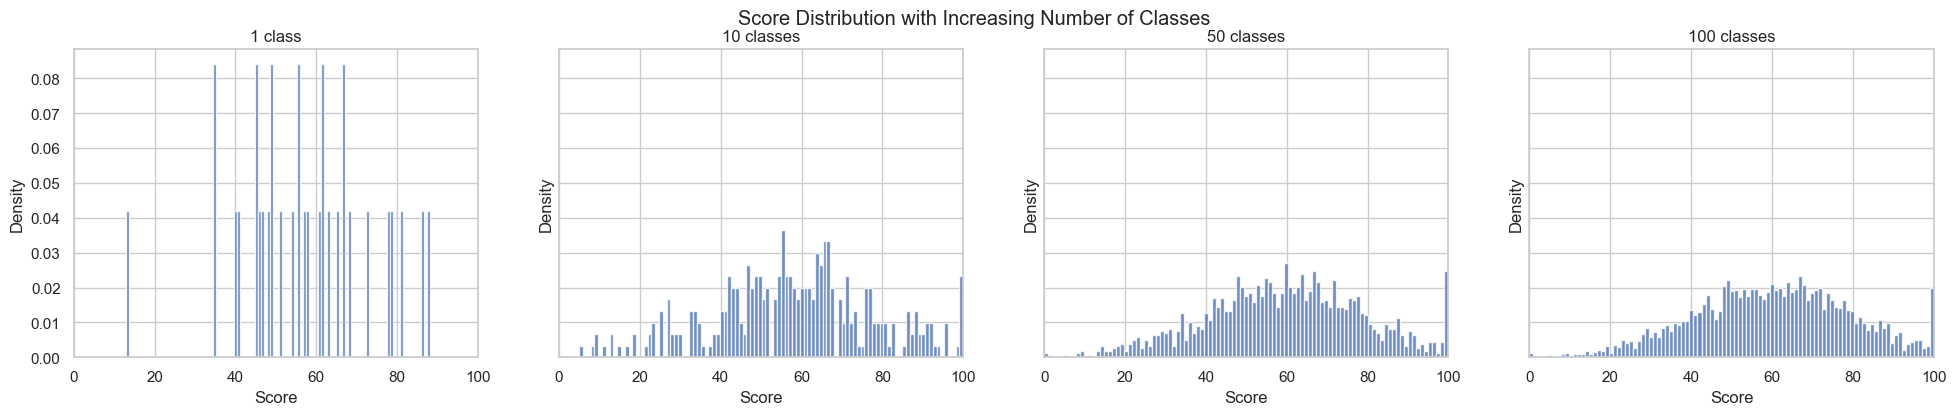

In [345]:
scores_1_class = generate_multiple_classes(1)
scores_10_classes = generate_multiple_classes(10)
scores_50_classes = generate_multiple_classes(50)
scores_100_classes = generate_multiple_classes(100)

fig, axs = plt.subplots(1, 4, figsize=(24, 4), sharey=True)

for ax, scores, title in zip(
    axs,
    [scores_1_class, scores_10_classes, scores_50_classes, scores_100_classes],
    ["1 class", "10 classes", "50 classes", "100 classes"]
):
    ax.hist(scores, bins=101, density=True, alpha=0.8)
    ax.set_title(title)
    ax.set_xlabel("Score")
    ax.set_ylabel("Density")
    ax.set_xlim([0, 100])
    # ax.set_ylim([0.0, 0.2])

plt.suptitle("Score Distribution with Increasing Number of Classes")
plt.show()


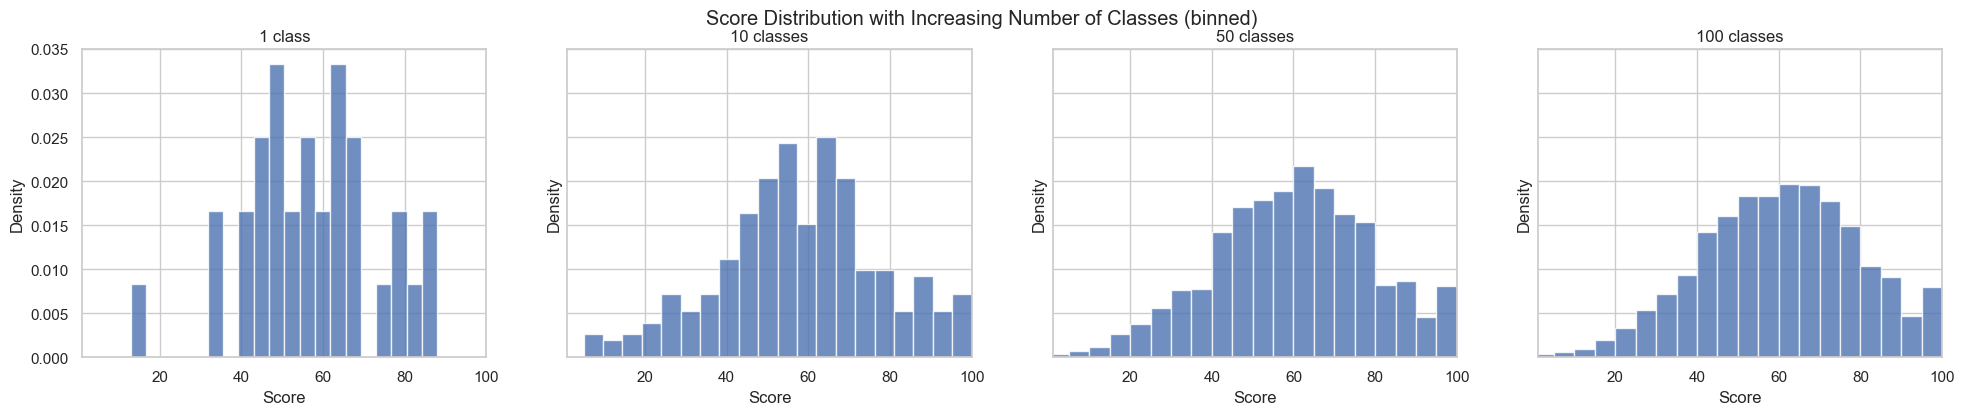

In [344]:
fig, axs = plt.subplots(1, 4, figsize=(24, 4), sharey=True)
for ax, scores, title in zip(
    axs,
    [scores_1_class, scores_10_classes, scores_50_classes, scores_100_classes],
    ["1 class", "10 classes", "50 classes", "100 classes"]
):
    ax.hist(scores, bins=20, density=True, alpha=0.8)
    ax.set_title(title)
    ax.set_xlabel("Score")
    ax.set_ylabel("Density")
    ax.set_xlim([1, 100])
    # ax.set_ylim([0.0, 0.2])

plt.suptitle("Score Distribution with Increasing Number of Classes (binned)")
plt.show()

In [351]:
SHANNON_ESTIMATORS = [
    "discrete",
    "miller_madow",
    "grassberger",
    "shrink",
    "cs",
    "cwj",
    "bayes",
    # "nsb",
    # 'ansb',
    "bonachela",
    'zhang'
]


In [352]:
def compute_entropy_all_estimators(
    data,
    estimators,
    alpha=0.5,
    bins=None,
    base=2,
):
    records = []
    for est in estimators:
        try:
            if est == 'bayes':
                H = im.entropy(
                    data,
                    approach=est,
                    alpha=alpha,
                    # bins=bins,
                    base=base
                )
            else:
                H = im.entropy(
                data,
                approach=est,
                # bins=bins,
                base=base
            )
        except Exception:
            H = np.nan

        records.append({
            "estimator": est,
            "entropy": H,
            "bins": bins
        })
    return pd.DataFrame(records)


In [353]:
#experiment 1 with incresing class number, calculate the entropy
CLASS_COUNTS = [1, 5, 10, 50, 100, 500, 1000]
BIN_SIZE = 101   # alphabet = 0–100

all_results = []

for n_classes in CLASS_COUNTS:
    scores = generate_multiple_classes(n_classes)
    df = compute_entropy_all_estimators(
        scores,
        SHANNON_ESTIMATORS,
        bins=BIN_SIZE,
        base=2
    )
    df["n_classes"] = n_classes
    all_results.append(df)

df_entropy_classes = pd.concat(all_results, ignore_index=True)
df_entropy_classes


2026-01-20 14:40:59,111 |  WARNING | chao_wang_jost.py:113 | There are no singletons and doubletons in the data, the corrections becomes negible.
2026-01-20 14:40:59,161 |  WARNING | chao_wang_jost.py:113 | There are no singletons and doubletons in the data, the corrections becomes negible.


,estimator,entropy,bins,n_classes
0,discrete,4.625000,101,1
1,miller_madow,5.188553,101,1
2,grassberger,5.562241,101,1
3,shrink,4.700440,101,1
4,cs,6.216596,101,1
...,...,...,...,...
58,cs,6.256894,101,1000
59,cwj,6.259148,101,1000
60,bayes,6.258542,101,1000
61,bonachela,6.272826,101,1000


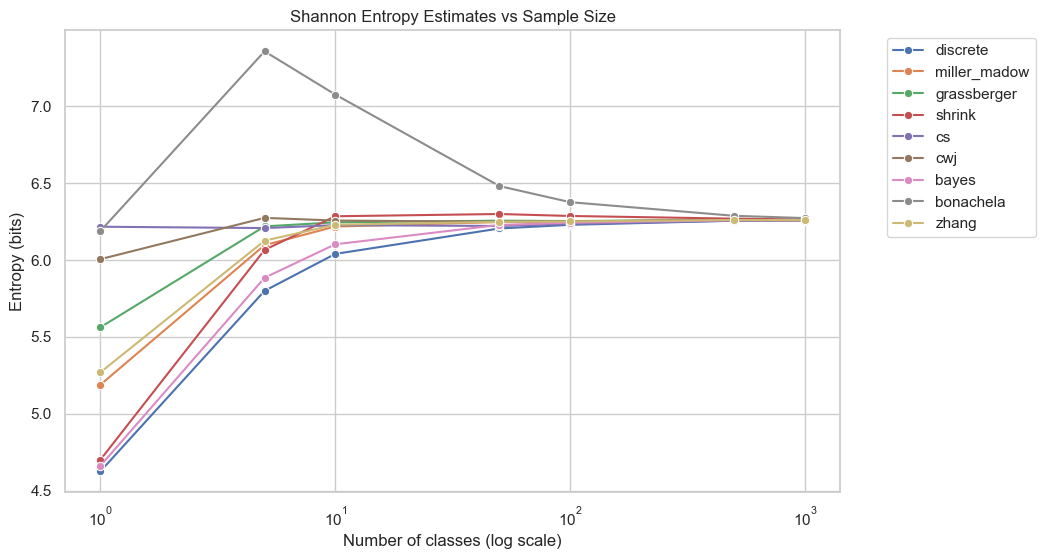

In [354]:
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=df_entropy_classes,
    x="n_classes",
    y="entropy",
    hue="estimator",
    marker="o"
)

plt.xscale("log")
plt.xlabel("Number of classes (log scale)")
plt.ylabel("Entropy (bits)")
plt.title("Shannon Entropy Estimates vs Sample Size")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


In [ ]:
# adjusting the bin size when the sampled class (number of scores) is sparse (e.g. 10 classes observed only)
BIN_SIZES = [5, 10, 20, 50, 101]
N_CLASSES_FIXED = 10

all_results_bins = []

for bins in BIN_SIZES:
    scores = generate_multiple_classes(N_CLASSES_FIXED, n_bins = bins)
    df = compute_entropy_all_estimators(
        scores,
        SHANNON_ESTIMATORS,
        base=2
    )
    df["bins"] = bins
    all_results_bins.append(df)

df_entropy_bins = pd.concat(all_results_bins, ignore_index=True)
df_entropy_bins


2026-01-20 14:43:23,823 |  WARNING | chao_wang_jost.py:113 | There are no singletons and doubletons in the data, the corrections becomes negible.
2026-01-20 14:43:23,826 |  WARNING | chao_wang_jost.py:113 | There are no singletons and doubletons in the data, the corrections becomes negible.
2026-01-20 14:43:23,828 |  WARNING | chao_wang_jost.py:113 | There are no singletons and doubletons in the data, the corrections becomes negible.


,estimator,entropy,bins
0,discrete,1.989308,5
1,miller_madow,1.998325,5
2,grassberger,2.013715,5
3,shrink,2.008849,5
4,cs,1.989310,5
5,cwj,1.998382,5
6,bayes,1.995191,5
7,bonachela,1.997152,5
8,zhang,1.998382,5
9,discrete,2.959191,10


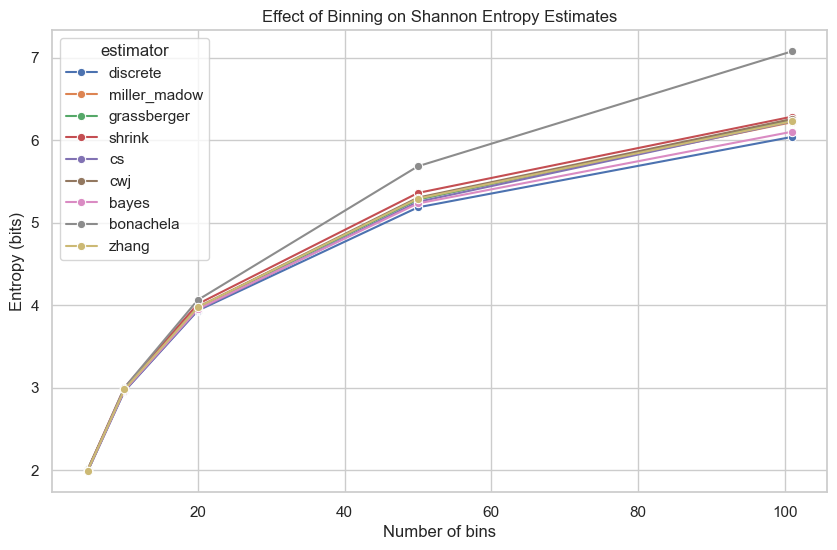

In [365]:
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=df_entropy_bins,
    x="bins",
    y="entropy",
    hue="estimator",
    marker="o"
)

plt.xlabel("Number of bins")
plt.ylabel("Entropy (bits)")
plt.title("Effect of Binning on Shannon Entropy Estimates")
plt.show()


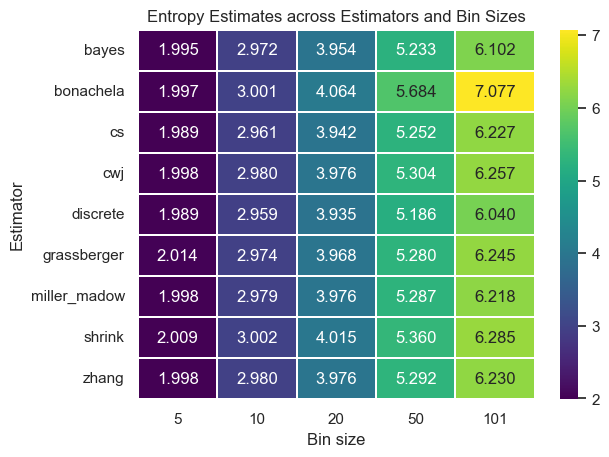

In [366]:
pivot = df_entropy_bins.pivot(
    index="estimator",
    columns="bins",
    values="entropy"
)

sns.heatmap(
    pivot,
    cmap="viridis",
    annot=True,
    fmt=".3f",
    linewidths=0.3
)

plt.title("Entropy Estimates across Estimators and Bin Sizes")
plt.xlabel("Bin size")
plt.ylabel("Estimator")
plt.show()
